<a href="https://colab.research.google.com/github/guowenbin90/WSI_annotation/blob/main/WSI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from lxml import etree

# specify the path to your XML file
xml_file_path = "/content/drive/MyDrive/2023WSI_assignment/K1PAS.xml"

# parse the XML file using lxml
tree = etree.parse(xml_file_path)

# get the root element
root = tree.getroot()

# set the Id value of the layer you want to extract
layer_id = '1'

# find the Region elements that belong to the specified layer
regions = root.xpath(f'//Region[@Id]/ancestor::Annotation[@Id="{layer_id}"]/Regions/Region/Vertices')

# extract the X and Y attributes from each Region element
for region in regions:
    x = region.xpath('Vertex/@X')
    y = region.xpath('Vertex/@Y')
    print(f'X: {x}')
    print(f'Y: {y}')




X: ['20436', '20434', '20429', '20427', '20425', '20422', '20420', '20418', '20416', '20414', '20411', '20407', '20405', '20402', '20400', '20398', '20396', '20394', '20391', '20389', '20387', '20385', '20382', '20380', '20380', '20378', '20378', '20376', '20374', '20374', '20371', '20369', '20369', '20367', '20365', '20365', '20362', '20362', '20360', '20358', '20356', '20356', '20354', '20354', '20351', '20349', '20349', '20347', '20345', '20342', '20342', '20340', '20340', '20340', '20338', '20338', '20336', '20336', '20334', '20334', '20334', '20331', '20331', '20331', '20329', '20329', '20327', '20327', '20327', '20327', '20327', '20325', '20325', '20325', '20325', '20325', '20325', '20322', '20322', '20322', '20322', '20322', '20322', '20320', '20320', '20320', '20320', '20318', '20318', '20316', '20316', '20314', '20314', '20311', '20311', '20311', '20311', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309', '20309

In [5]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,027 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:

In [26]:
import openslide
from PIL import Image, ImageDraw
import numpy as np
from lxml import etree

# specify the path to your svs file
svs_file_path = "/content/drive/MyDrive/2023WSI_assignment/K1PAS.svs"

# specify the level to extract the image at
level = 0

# specify the path to your xml file
xml_file_path = "/content/drive/MyDrive/2023WSI_assignment/K1PAS.xml"

# specify the path to save the extracted image and its boundary mask
output_file_path = '/content/drive/MyDrive/2023WSI_assignment/'



In [7]:
# open the svs file using openslide
slide = openslide.OpenSlide(svs_file_path)

# get the dimensions of the slide at the specified level
level_dimensions = slide.level_dimensions[level]

# parse the xml file using lxml
xml_root = etree.parse(xml_file_path).getroot()

# # specify the ID of the layer to extract
# layer_id = 1

# # find the Region elements that belong to the specified layer
# regions = root.xpath(f'//Region[@Id]/ancestor::Annotation[@Id="{layer_id}"]/Regions/Region/Vertices')

In [8]:
# loop over the annotations in the xml file
for annotation in xml_root.iter('Annotation'):
    # get the ID of the current annotation
    annotation_id = int(annotation.get('Id'))
    print(annotation_id)

1
2


In [39]:
#vertices = []
# loop over the annotations in the xml file
for annotation in xml_root.iter('Annotation'):
    # get the ID of the current annotation
    annotation_id = int(annotation.get('Id'))
    print(annotation_id)
    # find the Region elements that belong to the specified layer
    regions = root.xpath(f'//Region[@Id]/ancestor::Annotation[@Id="{annotation_id}"]/Regions/Region/Vertices')

    # extract the X and Y attributes from each Region element
    
    for region in regions:
        #print(region)

        
        x_list = region.xpath('Vertex/@X')
        y_list = region.xpath('Vertex/@Y')
        
        x_list_int = [int(x) for x in x_list]
        y_list_int = [int(y) for y in y_list]

        print(x_list_int)
        print(y_list_int)
        vertices = [(x,y) for x, y in zip(x_list_int, y_list_int)]
        
        #print(len(vertices))
        #print(vertices[1])

        min_x, min_y, max_x, max_y = min(x_list_int), min(y_list_int), max(x_list_int), max(y_list_int)
        print(min_x, min_y, max_x, max_y)

1
[20436, 20434, 20429, 20427, 20425, 20422, 20420, 20418, 20416, 20414, 20411, 20407, 20405, 20402, 20400, 20398, 20396, 20394, 20391, 20389, 20387, 20385, 20382, 20380, 20380, 20378, 20378, 20376, 20374, 20374, 20371, 20369, 20369, 20367, 20365, 20365, 20362, 20362, 20360, 20358, 20356, 20356, 20354, 20354, 20351, 20349, 20349, 20347, 20345, 20342, 20342, 20340, 20340, 20340, 20338, 20338, 20336, 20336, 20334, 20334, 20334, 20331, 20331, 20331, 20329, 20329, 20327, 20327, 20327, 20327, 20327, 20325, 20325, 20325, 20325, 20325, 20325, 20322, 20322, 20322, 20322, 20322, 20322, 20320, 20320, 20320, 20320, 20318, 20318, 20316, 20316, 20314, 20314, 20311, 20311, 20311, 20311, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20311, 20314, 20314, 20316, 20316, 20318, 20318, 20318, 20320, 20320, 20322, 20322, 20322, 20322, 20322, 20325, 20325, 20325, 20325, 20327, 20329, 20329, 20329, 20331, 20331, 20331, 203

1
[20436, 20434, 20429, 20427, 20425, 20422, 20420, 20418, 20416, 20414, 20411, 20407, 20405, 20402, 20400, 20398, 20396, 20394, 20391, 20389, 20387, 20385, 20382, 20380, 20380, 20378, 20378, 20376, 20374, 20374, 20371, 20369, 20369, 20367, 20365, 20365, 20362, 20362, 20360, 20358, 20356, 20356, 20354, 20354, 20351, 20349, 20349, 20347, 20345, 20342, 20342, 20340, 20340, 20340, 20338, 20338, 20336, 20336, 20334, 20334, 20334, 20331, 20331, 20331, 20329, 20329, 20327, 20327, 20327, 20327, 20327, 20325, 20325, 20325, 20325, 20325, 20325, 20322, 20322, 20322, 20322, 20322, 20322, 20320, 20320, 20320, 20320, 20318, 20318, 20316, 20316, 20314, 20314, 20311, 20311, 20311, 20311, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20309, 20311, 20314, 20314, 20316, 20316, 20318, 20318, 20318, 20320, 20320, 20322, 20322, 20322, 20322, 20322, 20325, 20325, 20325, 20325, 20327, 20329, 20329, 20329, 20331, 20331, 20331, 203

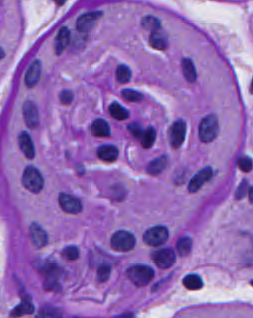

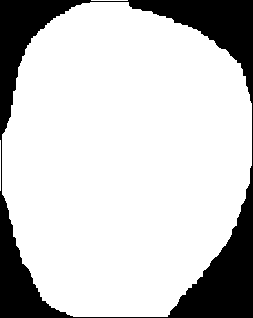

[19467, 19460, 19458, 19454, 19449, 19447, 19442, 19440, 19438, 19434, 19431, 19429, 19427, 19425, 19422, 19420, 19418, 19416, 19414, 19411, 19409, 19407, 19407, 19402, 19400, 19398, 19398, 19396, 19394, 19391, 19391, 19389, 19387, 19385, 19382, 19380, 19376, 19374, 19371, 19369, 19367, 19365, 19362, 19362, 19360, 19360, 19358, 19356, 19356, 19354, 19351, 19349, 19349, 19347, 19345, 19345, 19342, 19340, 19340, 19338, 19338, 19336, 19336, 19336, 19334, 19331, 19329, 19327, 19325, 19322, 19322, 19320, 19320, 19318, 19316, 19314, 19314, 19311, 19311, 19309, 19307, 19305, 19305, 19305, 19305, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19302, 19305, 19307, 19309, 19309, 19314, 19314, 19316, 19320, 19322, 19327, 19329, 19334, 19336, 19340, 19342, 19347, 19349, 19354, 19358, 19365, 19367, 19369, 19374, 19376, 19380, 19382, 19382, 19385, 19385, 19389, 19389, 19391, 19391, 19396, 19398, 19400, 19405, 19416, 19425, 19445, 19465, 19489, 19511

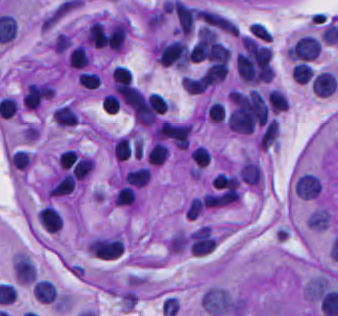

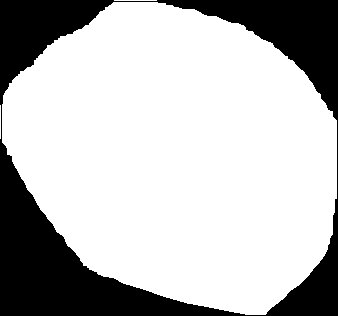

2
[19885, 19889, 19891, 19896, 19898, 19905, 19911, 19916, 19922, 19925, 19929, 19934, 19938, 19940, 19942, 19947, 19951, 19954, 19958, 19962, 19967, 19969, 19974, 19978, 19980, 19982, 19982, 19987, 19989, 19991, 19996, 19998, 20000, 20005, 20005, 20009, 20009, 20014, 20014, 20016, 20018, 20020, 20025, 20025, 20027, 20027, 20027, 20027, 20027, 20027, 20027, 20027, 20027, 20027, 20025, 20025, 20022, 20020, 20018, 20018, 20011, 20009, 20005, 20002, 19998, 19994, 19991, 19989, 19985, 19982, 19978, 19976, 19974, 19971, 19967, 19967, 19965, 19962, 19960, 19958, 19956, 19954, 19949, 19945, 19940, 19936, 19931, 19929, 19927, 19925, 19920, 19918, 19914, 19909, 19905, 19898, 19894, 19887, 19882, 19878, 19876, 19869, 19867, 19865, 19862, 19860, 19856, 19854, 19851, 19849, 19847, 19842, 19840, 19840, 19838, 19838, 19836, 19834, 19829, 19825, 19822, 19816, 19814, 19809, 19807, 19805, 19805, 19800, 19800, 19798, 19794, 19791, 19791, 19787, 19785, 19782, 19780, 19776, 19774, 19769, 19767, 19767, 197

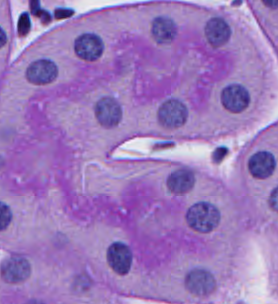

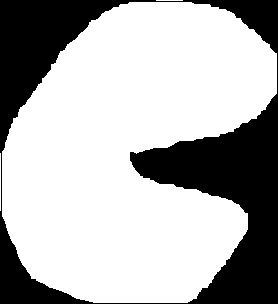

In [55]:
#vertices = []
# loop over the annotations in the xml file
for annotation in xml_root.iter('Annotation'):
    # get the ID of the current annotation
    annotation_id = int(annotation.get('Id'))
    print(annotation_id)
    # find the Region elements that belong to the specified layer
    regions = root.xpath(f'//Region[@Id]/ancestor::Annotation[@Id="{annotation_id}"]/Regions/Region/Vertices')

    # extract the X and Y attributes from each Region element
    
    for region in regions:
        #print(region)

        
        x_list = region.xpath('Vertex/@X')
        y_list = region.xpath('Vertex/@Y')
        
        x_list_int = [int(x) for x in x_list]
        y_list_int = [int(y) for y in y_list]

        print(x_list_int)
        print(y_list_int)
        vertices = [(x,y) for x, y in zip(x_list_int, y_list_int)]
        
        #print(len(vertices))
        #print(vertices[1])

        min_x, min_y, max_x, max_y = min(x_list_int), min(y_list_int), max(x_list_int), max(y_list_int)
        print(min_x, min_y, max_x, max_y)


        # create an Image object to store the extracted region
        region_image = Image.new('RGB', (max_x - min_x, max_y - min_y))

        # draw the boundary mask for the extracted region
        boundary_mask = Image.new('1', region_image.size, 0)
        draw = ImageDraw.Draw(boundary_mask)
        draw.polygon(vertices, outline=255, fill=None)
        draw.polygon([(v[0]-min_x, v[1]-min_y) for v in vertices], outline=255, fill=255)
        draw.rectangle([(1, 1), (max_x - min_x - 1, max_y - min_y - 1)], fill=None, outline=0)

        # extract the region from the svs file and paste it into the Image object
        region = slide.read_region((min_x, min_y), level, (max_x - min_x, max_y - min_y))
        region_image.paste(region, (0, 0))

        # save the extracted image and its boundary mask
        # region_image.save(f'{output_file_path}_{annotation_id}_{min_x}.png')
        # Image.fromarray(boundary_mask).save(f'{output_file_path}_{annotation_id}_{min_x}mask.png')
        region_image.save(f'{output_file_path}_{annotation_id}_{min_x}.tiff', format='TIFF')
        boundary_mask.save(f'{output_file_path}_{annotation_id}_{min_x}_mask.tiff', format='TIFF')
        region_image.show()
        boundary_mask.show()

In [56]:
import json

# Create an empty list to store the JSON objects
json_objects = []

# Loop through all the annotations and regions
for annotation in xml_root.xpath('//Annotation'):
    annotation_data = {'id': annotation.get('Id'), 'name': annotation.get('Name'), 'regions': []}
    for region in annotation.xpath('./Regions/Region'):
        region_data = {'id': region.get('Id'), 'vertices': []}
        for vertex in region.xpath('./Vertices/Vertex'):
            # Convert the X, Y, and Z coordinates from strings to integers
            x, y, z = int(vertex.get('X')), int(vertex.get('Y')), int(vertex.get('Z'))
            region_data['vertices'].append({'point': {'x': x, 'y': y, 'z': z}})
        # Add the region data to the annotation data
        annotation_data['regions'].append({'polyline': region_data})
    # Add the annotation data to the JSON objects list
    json_objects.append(annotation_data)

# Save the JSON objects to a file
json_file = '/content/drive/MyDrive/2023WSI_assignment/annotations.json'
with open(json_file, 'w') as f:
    json.dump(json_objects, f, indent=2)
